# PAPER 2 : Anomaly Detection

## Step 1 : Bussiness Understanding

**Anomaly detection** is the identification of unusual patterns or deviations from the norm within a dataset, **crucial** for uncovering potential threats or abnormal behaviors, particularly in cybersecurity.

We are working with a dataset that provides information on actual traffic packets that are being routed through firewalls. To put it another way, the incursions into networks are of importance to this dataset. 

## NSL-KDD Dataset

#### Description

The NSL-KDD dataset, an optimized iteration of the KDD Cup 99 dataset, serves as a pivotal resource for anomaly detection initiatives. It meticulously balances normal and attack traces within its 41 attributes, encompassing features like connection duration, byte transfer, and content-related aspects. Each record is meticulously labeled, distinguishing between normal and various attack types such as DoS, Probe, R2L, and U2R. This curated dataset facilitates robust anomaly detection models by offering a comprehensive and diverse set of features to explore intricate patterns in network behavior.

#### Feature description

>* **Duration:** Length of time duration of the connection
>* **Protocol_type:** Protocol used in the connection
>* **Service:** Destination network service used
>* **Flag:** Status of the connection – Normal or Error
>* **Src_bytes:** Number of data bytes transferred from source to destination in single connection
>* **Dst_bytes:** Number of data bytes transferred from destination to source in single connection
>* **Land:** if source and destination IP addresses and port numbers are equal then, this variable takes value 1 else 0
>* **Wrong_fragment:** Total number of wrong fragments in this connection
>* **Urgent:** Number of urgent packets in this connection. Urgent packets are packets with the urgent bit activated
>* **Hot:** Number of "hot" indicators in the content such as: entering a system directory, creating programs and executing programs
>* **Num_failed _logins:** Count of failed login attempts
>* **Logged_in Login Status:** 1 if successfully logged in; 0 otherwise
>* **Num_compromised:** Number of "compromised" conditions
>* **Root_shell:** 1 if root shell is obtained; 0 otherwise
>* **Su_attempted:** 1 if "su root" command attempted or used; 0 otherwise
>* **Num_root:** Number of "root" accesses or number of operations performed as a root in the connection
>* **Num_file_creations:** Number of file creation operations in the connection
>* **Num_shells:** Number of shell prompts
>* **Num_access_files:** Number of operations on access control files
>* **Num_outbound_cmds:** Number of outbound commands in an ftp session
>* **Is_hot_login:** 1 if the login belongs to the "hot" list i.e., root or admin; else 0
>* **Is_guest_login:** 1 if the login is a "guest" login; 0 otherwise
>* **Count:** Number of connections to the same destination host as the current connection in the past two seconds
>* **Srv_count:** Number of connections to the same service (port number) as the current connection in the past two seconds
>* **Serror_rate:** The percentage of connections that have activated the flag (4) s0, s1, s2 or s3, among the connections aggregated in count (23)
>* **Srv_serror_rate:** The percentage of connections that have activated the flag (4) s0, s1, s2 or s3, among the connections aggregated in srv_count (24)
>* **Rerror_rate:** The percentage of connections that have activated the flag (4) REJ, among the connections aggregated in count (23)
>* **Srv_rerror_rate:** The percentage of connections that have activated the flag (4) REJ, among the connections aggregated in srv_count (24)
>* **Same_srv_rate:** The percentage of connections that were to the same service, among the connections aggregated in count (23)
>* **Diff_srv_rate:** The percentage of connections that were to different services, among the connections aggregated in count (23)
>* **diff_host rate:** percentage of connections that were to different destination machines among the connections aggregated in srv_count (24)
>* **Dst_host_count:** Number of connections having the same destination host IP address
>* **Dst_host_srv_count:** Number of connections having the same port number
>* **Dst_host_same_srv_rate:** The percentage of connections that were to the same service, among the connections aggregated in - dst_host_count (32)
>* **Dst_hostdiff srv_rate:** The percentage of connections that were to different services, among the connections aggregated in - dst_host_count (32)
>* **Dst_host_same_src_port_rate:** The percentage of connections that were to the same source port, among the connections aggregated in dst_host_srv_c ount (33)
>* **Dst_hostsrv diff_host_rate:** The percentage of connections that were to different destination machines, among the connections aggregated in dst_host_srv_count (33)
>* **Dst_host_serror_rate:** The percentage of connections that have activated the flag (4) s0, s1, s2 or s3, among the connections aggregated in dst_host_count (32)
>* **Dst_host_srv_s error_rate:** The percent of connections that have activated the flag (4) s0, s1, s2 or s3, among the connections aggregated in dst_host_srv_c ount (33)
>* **Dst_host_rerror_rate:** The percentage of connections that have activated the flag (4) REJ, among the connections aggregated in dst_host_count (32)
>* **Dst_host_srv_rerror_rate:** The percentage of connections that have activated the flag (4) REJ, among the connections aggregated in dst_host_srv_c ount (33)

We have 4 types of attacks that may be important to us:
>* **DoS:** An attack aimed at impeding user access to specific services by overwhelming the system or monopolizing network resources.
>* **U2R:** An attacker attempting to gain root-level access to the service can exfiltrate and view all sensitive data.
>* **R2L:** An attacker, for instance, engages in password guessing to gain unauthorized access by sending remote requests to the server from an external machine.
>* **Probe Attack:** An attempt to gather comprehensive network data and information for subsequent exploitation or unauthorized use.

To understand this data more we will first import all the libraries that we will need eventually for either visualization, data cleaning and all the other steps that we will be going through.
### Load the Libraries

In [2]:
import sys                                          # Read system parameters.
import os                                           # Interact with the operating system.
import numpy as np                                  # Work with multi-dimensional arrays and matrices.
import pandas as pd                                 # Manipulate and analyze data.
import matplotlib                                   # Create 2D charts.
import matplotlib.pyplot as plt                     # Create plots and visualizations.
import seaborn as sns                               # Perform data visualization.
import scipy as sp                                  # Perform scientific computing and advanced mathematics.
import sklearn                                      # Perform data mining and analysis.
from time import time                               # Calculate training time.
from sklearn import metrics                         # Evaluate model performance metrics.
from sklearn.model_selection import GridSearchCV    # Perform hyperparameter tuning using grid search.

In [3]:
import warnings
warnings.filterwarnings('ignore')

## Step 2 : Data Understanding

### Load Train dataset and Test dataset 

In [4]:
file_path_full_training_set = 'NSL-KDD/KDDTrain+.csv'
file_path_full_testing_set = 'NSL-KDD/KDDTest+.csv'
d_raw_train = pd.read_csv(file_path_full_training_set)
d_raw_test = pd.read_csv(file_path_full_testing_set)

In [5]:
print('Train shape',d_raw_train.shape)
print('Test shape',d_raw_test.shape)

Train shape (125973, 42)
Test shape (22544, 42)


In [6]:
d_raw_train.describe()

,'duration','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised',...,'dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate'
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
d_raw_test.describe()

,'duration','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised',...,'dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate'
count,22544.000000,2.254400e+04,2.254400e+04,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,...,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000
mean,218.859076,1.039545e+04,2.056019e+03,0.000311,0.008428,0.000710,0.105394,0.021647,0.442202,0.119899,...,193.869411,140.750532,0.608722,0.090540,0.132261,0.019638,0.097814,0.099426,0.233385,0.226683
std,1407.176612,4.727864e+05,2.121930e+04,0.017619,0.142599,0.036473,0.928428,0.150328,0.496659,7.269597,...,94.035663,111.783972,0.435688,0.220717,0.306268,0.085394,0.273139,0.281866,0.387229,0.400875
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,121.000000,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
d_raw_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   'duration'                     125973 non-null  int64  
 1   'protocol_type'                125973 non-null  object 
 2   'service'                      125973 non-null  object 
 3   'flag'                         125973 non-null  object 
 4   'src_bytes'                    125973 non-null  int64  
 5   'dst_bytes'                    125973 non-null  int64  
 6   'land'                         125973 non-null  int64  
 7   'wrong_fragment'               125973 non-null  int64  
 8   'urgent'                       125973 non-null  int64  
 9   'hot'                          125973 non-null  int64  
 10  'num_failed_logins'            125973 non-null  int64  
 11  'logged_in'                    125973 non-null  int64  
 12  'num_compromised'             

In [9]:
d_raw_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 42 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   'duration'                     22544 non-null  int64  
 1   'protocol_type'                22544 non-null  object 
 2   'service'                      22544 non-null  object 
 3   'flag'                         22544 non-null  object 
 4   'src_bytes'                    22544 non-null  int64  
 5   'dst_bytes'                    22544 non-null  int64  
 6   'land'                         22544 non-null  int64  
 7   'wrong_fragment'               22544 non-null  int64  
 8   'urgent'                       22544 non-null  int64  
 9   'hot'                          22544 non-null  int64  
 10  'num_failed_logins'            22544 non-null  int64  
 11  'logged_in'                    22544 non-null  int64  
 12  'num_compromised'              22544 non-null 

Split the datasets to With_labels and without_Labels.

In [10]:
#Split the Train data & Labels
train_WithoutLabels=d_raw_train.iloc[:,0:41];
#Labels
train_Labels=d_raw_train.iloc[:,41];

train_WithoutLabels.head()

,'duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot',...,'dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate'
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,udp,other,SF,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,tcp,private,S0,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,tcp,http,SF,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [11]:
#Split the Test data & Labels
test_WithoutLabels=d_raw_test.iloc[:,0:41];
#Labels
test_Labels=d_raw_test.iloc[:,41];

test_WithoutLabels.head()

,'duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot',...,'dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate'
0,0,tcp,private,REJ,0,0,0,0,0,0,...,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00
1,0,tcp,private,REJ,0,0,0,0,0,0,...,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71


Let's observe the number of unique values in each of Train and Test datasets WithoutLabels

In [12]:
print('The unique value in the Train dataset')
train_WithoutLabels.nunique()

The unique value in the Train dataset


'duration'                       2981
'protocol_type'                     3
'service'                          70
'flag'                             11
'src_bytes'                      3341
'dst_bytes'                      9326
'land'                              2
'wrong_fragment'                    3
'urgent'                            4
'hot'                              28
'num_failed_logins'                 6
'logged_in'                         2
'num_compromised'                  88
'root_shell'                        2
'su_attempted'                      3
'num_root'                         82
'num_file_creations'               35
'num_shells'                        3
'num_access_files'                 10
'num_outbound_cmds'                 1
'is_host_login'                     2
'is_guest_login'                    2
'count'                           512
'srv_count'                       509
'serror_rate'                      89
'srv_serror_rate'                  86
'rerror_rate

In [13]:
print('The unique value in the Test dataset')
test_WithoutLabels.nunique()

The unique value in the Test dataset


'duration'                        624
'protocol_type'                     3
'service'                          64
'flag'                             11
'src_bytes'                      1149
'dst_bytes'                      3650
'land'                              2
'wrong_fragment'                    3
'urgent'                            4
'hot'                              16
'num_failed_logins'                 5
'logged_in'                         2
'num_compromised'                  23
'root_shell'                        2
'su_attempted'                      3
'num_root'                         20
'num_file_creations'                9
'num_shells'                        4
'num_access_files'                  5
'num_outbound_cmds'                 1
'is_host_login'                     2
'is_guest_login'                    2
'count'                           495
'srv_count'                       457
'serror_rate'                      88
'srv_serror_rate'                  82
'rerror_rate

## Step 3 : Data Preparation

Check for duplicates values

In [14]:
#No duplicate values
train_WithoutLabels.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
125968    False
125969    False
125970    False
125971    False
125972    False
Length: 125973, dtype: bool

In [15]:
#No duplicate values
test_WithoutLabels.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
22539    False
22540    False
22541    False
22542    False
22543    False
Length: 22544, dtype: bool

Let's check for missing values in our datasets

In [16]:
#Train
pd.concat([train_WithoutLabels.isnull().sum(), 100 * train_WithoutLabels.isnull().sum()/len(train_WithoutLabels)], 
              axis=1).rename(columns={0:'Missing Records', 1:'Percentage (%)'})

,Missing Records,Percentage (%)
'duration',0,0.0
'protocol_type',0,0.0
'service',0,0.0
'flag',0,0.0
'src_bytes',0,0.0
'dst_bytes',0,0.0
'land',0,0.0
'wrong_fragment',0,0.0
'urgent',0,0.0
'hot',0,0.0


In [17]:
#Test
pd.concat([test_WithoutLabels.isnull().sum(), 100 * test_WithoutLabels.isnull().sum()/len(test_WithoutLabels)], 
              axis=1).rename(columns={0:'Missing Records', 1:'Percentage (%)'})

,Missing Records,Percentage (%)
'duration',0,0.0
'protocol_type',0,0.0
'service',0,0.0
'flag',0,0.0
'src_bytes',0,0.0
'dst_bytes',0,0.0
'land',0,0.0
'wrong_fragment',0,0.0
'urgent',0,0.0
'hot',0,0.0


In [18]:
######################
# Categorical columns
cat_col = [col for col in train_WithoutLabels.columns if train_WithoutLabels[col].dtype == 'object']
print('Categorical columns :',cat_col)
print('\n')
# Numerical columns
num_col = [col for col in train_WithoutLabels.columns if train_WithoutLabels[col].dtype != 'object']
print('Numerical columns :',num_col)

Categorical columns : ["'protocol_type'", "'service'", "'flag'"]


Numerical columns : ["'duration'", "'src_bytes'", "'dst_bytes'", "'land'", "'wrong_fragment'", "'urgent'", "'hot'", "'num_failed_logins'", "'logged_in'", "'num_compromised'", "'root_shell'", "'su_attempted'", "'num_root'", "'num_file_creations'", "'num_shells'", "'num_access_files'", "'num_outbound_cmds'", "'is_host_login'", "'is_guest_login'", "'count'", "'srv_count'", "'serror_rate'", "'srv_serror_rate'", "'rerror_rate'", "'srv_rerror_rate'", "'same_srv_rate'", "'diff_srv_rate'", "'srv_diff_host_rate'", "'dst_host_count'", "'dst_host_srv_count'", "'dst_host_same_srv_rate'", "'dst_host_diff_srv_rate'", "'dst_host_same_src_port_rate'", "'dst_host_srv_diff_host_rate'", "'dst_host_serror_rate'", "'dst_host_srv_serror_rate'", "'dst_host_rerror_rate'", "'dst_host_srv_rerror_rate'"]


We are going to drop the columns 'service' and 'flag'.

In [19]:
dropcol=["'service'","'flag'"]
train_WithoutLabels = train_WithoutLabels.drop(columns=dropcol)

In [20]:
train_WithoutLabels.head()

,'duration','protocol_type','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in',...,'dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate'
0,0,tcp,491,0,0,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,udp,146,0,0,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,tcp,0,0,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,tcp,232,8153,0,0,0,0,0,1,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,tcp,199,420,0,0,0,0,0,1,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [21]:
dropcol=["'service'","'flag'"]
test_WithoutLabels = test_WithoutLabels.drop(columns=dropcol)

In [22]:
test_WithoutLabels.head()

,'duration','protocol_type','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in',...,'dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate'
0,0,tcp,0,0,0,0,0,0,0,0,...,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00
1,0,tcp,0,0,0,0,0,0,0,0,...,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00
2,2,tcp,12983,0,0,0,0,0,0,0,...,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00
3,0,icmp,20,0,0,0,0,0,0,0,...,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00
4,1,tcp,0,15,0,0,0,0,0,0,...,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71


# Data Encoding

let's encode the column 'protocol'.

In [23]:
from sklearn.preprocessing import OneHotEncoder
#Train dataset

# Create an instance of One-hot-encoder 
enc = OneHotEncoder() 
  
# Passing encoded columns 
enc_data = pd.DataFrame(enc.fit_transform(train_WithoutLabels[["'protocol_type'"]]).toarray(),columns=['new_udp', 'new_tcp', 'new_icmp']) 
# Merge with main 
train_WithoutLabels = train_WithoutLabels.join(enc_data) 

train_WithoutLabels.head()

,'duration','protocol_type','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in',...,'dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate',new_udp,new_tcp,new_icmp
0,0,tcp,491,0,0,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0.0,1.0,0.0
1,0,udp,146,0,0,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0.0,0.0,1.0
2,0,tcp,0,0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0.0,1.0,0.0
3,0,tcp,232,8153,0,0,0,0,0,1,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0.0,1.0,0.0
4,0,tcp,199,420,0,0,0,0,0,1,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,1.0,0.0


In [24]:
from sklearn.preprocessing import OneHotEncoder
#Test dataset

# Create an instance of One-hot-encoder 
enc = OneHotEncoder() 
  
# Passing encoded columns 
enc_data = pd.DataFrame(enc.fit_transform(test_WithoutLabels[["'protocol_type'"]]).toarray(),columns=['new_udp', 'new_tcp', 'new_icmp']) 
# Merge with main 
test_WithoutLabels = test_WithoutLabels.join(enc_data) 

test_WithoutLabels.head()

,'duration','protocol_type','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in',...,'dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate',new_udp,new_tcp,new_icmp
0,0,tcp,0,0,0,0,0,0,0,0,...,0.06,0.00,0.00,0.0,0.0,1.00,1.00,0.0,1.0,0.0
1,0,tcp,0,0,0,0,0,0,0,0,...,0.06,0.00,0.00,0.0,0.0,1.00,1.00,0.0,1.0,0.0
2,2,tcp,12983,0,0,0,0,0,0,0,...,0.04,0.61,0.02,0.0,0.0,0.00,0.00,0.0,1.0,0.0
3,0,icmp,20,0,0,0,0,0,0,0,...,0.00,1.00,0.28,0.0,0.0,0.00,0.00,1.0,0.0,0.0
4,1,tcp,0,15,0,0,0,0,0,0,...,0.17,0.03,0.02,0.0,0.0,0.83,0.71,0.0,1.0,0.0


Now we drop the column.

In [25]:
drop_cols=["'protocol_type'"]
train_WithoutLabels.drop(drop_cols, axis=1, inplace=True)
train_WithoutLabels.head()

,'duration','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised',...,'dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate',new_udp,new_tcp,new_icmp
0,0,491,0,0,0,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0.0,1.0,0.0
1,0,146,0,0,0,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0.0,0.0,1.0
2,0,0,0,0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0.0,1.0,0.0
3,0,232,8153,0,0,0,0,0,1,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0.0,1.0,0.0
4,0,199,420,0,0,0,0,0,1,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,1.0,0.0


In [26]:
drop_cols=["'protocol_type'"]
test_WithoutLabels.drop(drop_cols, axis=1, inplace=True)
test_WithoutLabels.head()

,'duration','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised',...,'dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate',new_udp,new_tcp,new_icmp
0,0,0,0,0,0,0,0,0,0,0,...,0.06,0.00,0.00,0.0,0.0,1.00,1.00,0.0,1.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.06,0.00,0.00,0.0,0.0,1.00,1.00,0.0,1.0,0.0
2,2,12983,0,0,0,0,0,0,0,0,...,0.04,0.61,0.02,0.0,0.0,0.00,0.00,0.0,1.0,0.0
3,0,20,0,0,0,0,0,0,0,0,...,0.00,1.00,0.28,0.0,0.0,0.00,0.00,1.0,0.0,0.0
4,1,0,15,0,0,0,0,0,0,0,...,0.17,0.03,0.02,0.0,0.0,0.83,0.71,0.0,1.0,0.0


## Feature Selection

We used the PCA for our feature selection. the resulting outcome is 24 features

1 - We start by scaling the features in our dataset.

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_WithoutLabels)

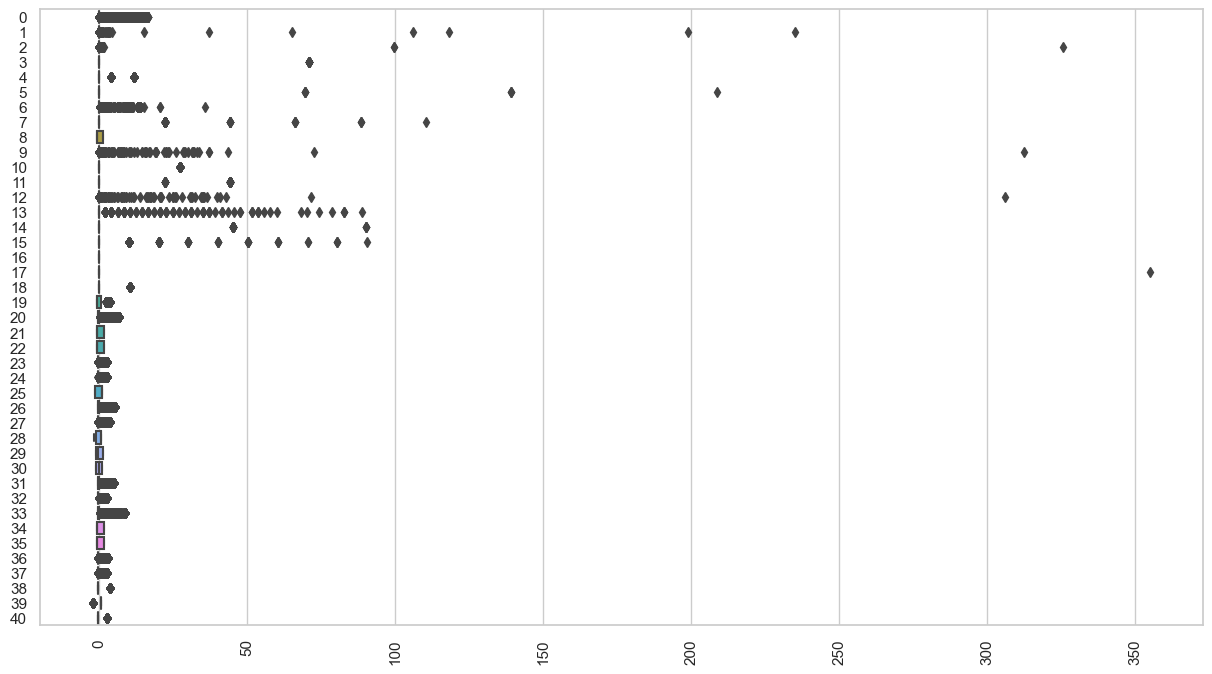

In [28]:
import seaborn as sns
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(data=train_scaled[:, 0:41], orient='h', whis=1.5)
plt.xticks(rotation=90)
plt.show()

2 - Let's create an instance of PCA class names pca. \
Then we fit the method to our dataset

In [29]:
#Train dataset
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(train_scaled)

PCA()

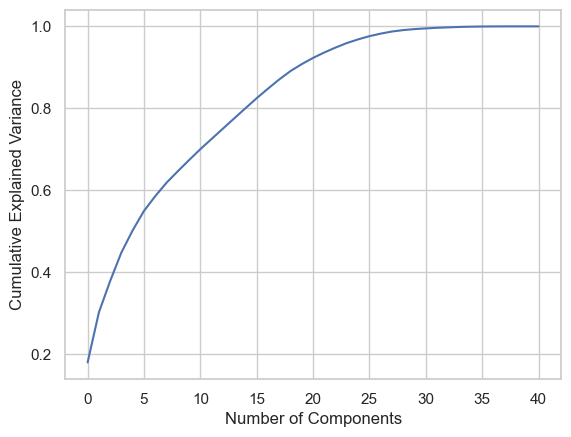

In [30]:
cum_vars = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cum_vars)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [31]:
chosen_dim = 24  #nb of components
train_transformed = pca.fit_transform(train_scaled)[:, :chosen_dim]
train_transformed

array([[-5.81303428e-01, -5.69140334e-02,  3.35329990e-01, ...,
        -8.66608039e-01,  8.90880291e-01,  1.19212458e-01],
       [ 9.07338452e-02,  1.04573717e+00, -3.10664675e+00, ...,
        -3.93289582e-01,  1.64315966e+00,  2.77231355e-01],
       [ 3.75900248e+00, -1.47113891e+00,  1.22905024e-01, ...,
        -1.50937328e-01, -1.59112801e-01, -6.97603877e-02],
       ...,
       [-1.96117712e-01, -6.05256722e-01,  1.12052089e+00, ...,
        -9.64606138e-01,  8.57703192e-01,  1.11178305e+00],
       [ 3.87602954e+00, -1.44891515e+00,  5.95212383e-02, ...,
        -1.12812263e-01, -1.30239193e-02, -1.56988381e-03],
       [-1.11166904e+00, -3.87370085e-01,  8.92587118e-01, ...,
        -1.16076484e+00,  1.00442795e+00,  7.31504950e-01]])

Now do the same for the Test dataset.

In [32]:
#Test dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
test_scaled = scaler.fit_transform(test_WithoutLabels)

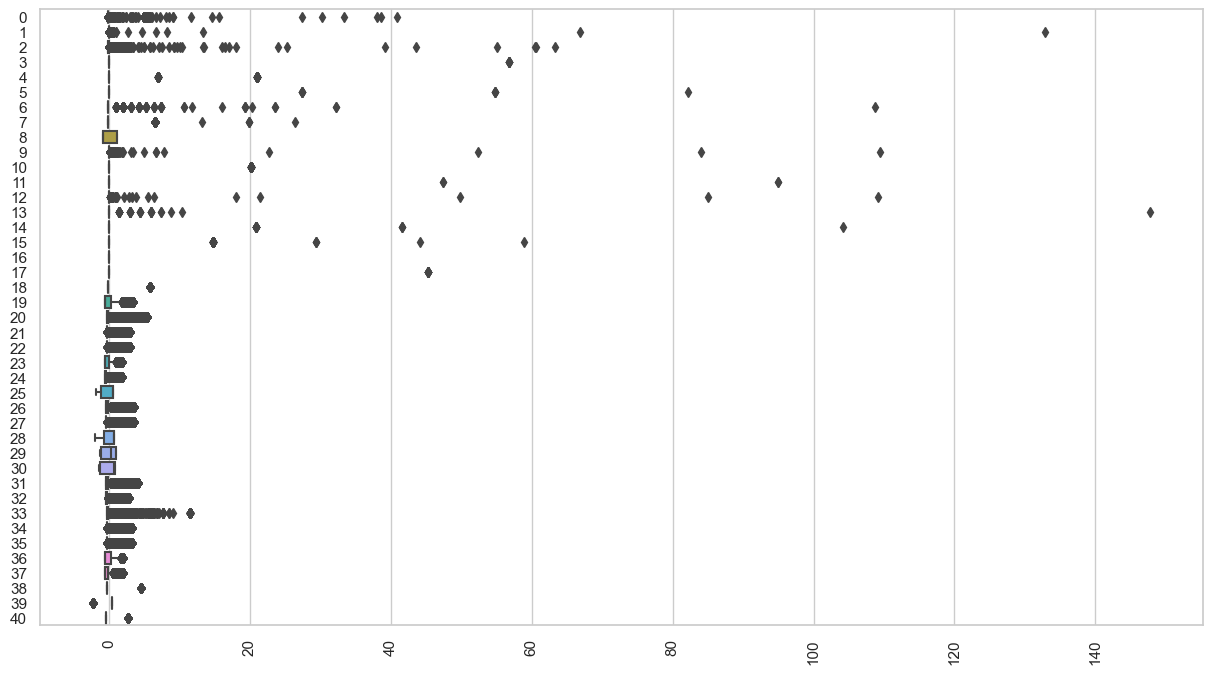

In [33]:
import seaborn as sns
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(data=test_scaled[:, 0:41], orient='h', whis=1.5)
plt.xticks(rotation=90)
plt.show()

In [34]:
#Train dataset
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(test_scaled)

PCA()

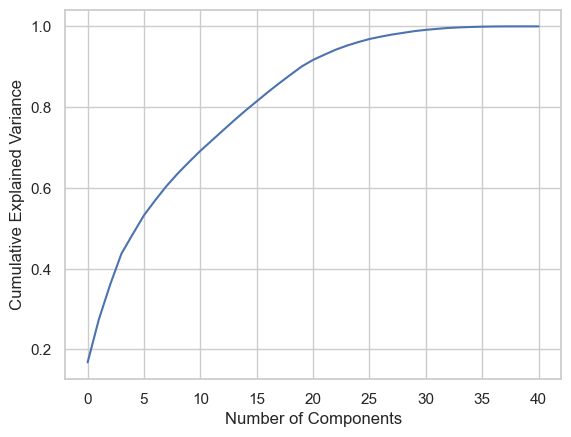

In [35]:
cum_vars = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cum_vars)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [36]:
chosen_dim = 24  #  number of components
test_transformed = pca.fit_transform(test_scaled)[:, :chosen_dim]
test_transformed

array([[ 4.32846179, -1.76658499,  0.18400606, ..., -0.04734682,
         0.02646071, -0.25448637],
       [ 4.26675288, -1.75137397,  0.43473777, ..., -0.28536034,
         0.13541408, -0.23370116],
       [-1.0628551 , -0.06341621, -0.20879282, ..., -1.25440366,
         0.52654065, -0.25698718],
       ...,
       [-1.92045375, -0.40313218,  1.30472143, ...,  0.0843928 ,
        -0.18807544,  0.10390085],
       [-1.97228151, -0.37434967, -1.79946898, ...,  0.14542581,
        -0.04035568,  0.45645249],
       [ 3.84283365, -1.99612137,  0.62798679, ...,  0.32246594,
        -0.16519226, -0.98987923]])

## Step 4 : Modeling & Step : 5 Evaluation 

### Kmeans

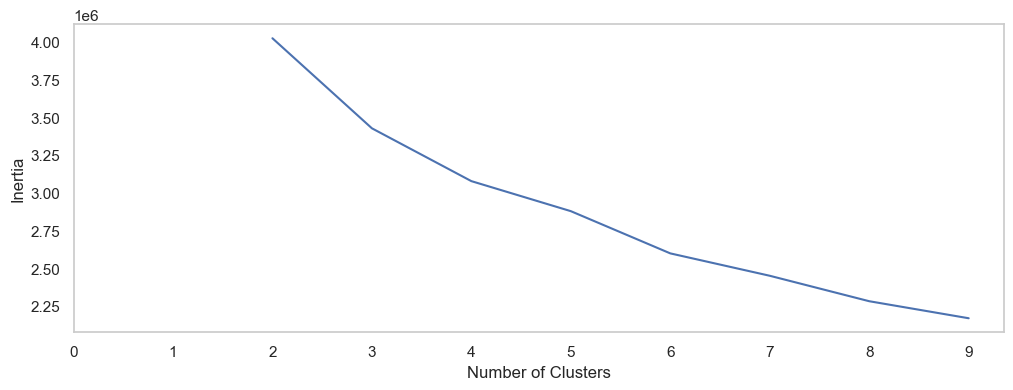

In [37]:
from sklearn.cluster import KMeans
inertias = []
for k in range(2, 10):
    kmeans = KMeans(random_state=0, n_clusters=k)
    kmeans.fit(train_transformed)
    inertias.append(kmeans.inertia_)
plt.figure(figsize=(12, 4))
plt.grid()
plt.plot(range(2, 10), inertias)
plt.xticks(range(0, 10))
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [38]:
#determine best value for the cluster
from kneed import KneeLocator
k = KneeLocator(range(2, 10), inertias, curve="convex", direction="decreasing")
k.elbow

6

#### Construction of K-means model

In [39]:
#Cluster K-means
Kmeans_model=KMeans(random_state=0,n_clusters=6)
#fit the model
Kmeans_model.fit(train_transformed)

KMeans(n_clusters=6, random_state=0)

In [40]:
#Cluster centers
display(Kmeans_model.cluster_centers_)

array([[-2.00728315e+00, -6.51341840e-01,  1.21107573e+00,
        -3.07510707e-01,  2.18104254e-02, -2.99970020e-01,
        -1.33933778e-01,  2.45180073e-02, -3.97500481e-02,
        -1.10127308e-01,  2.13115805e-01,  9.99375758e-03,
         2.20786533e-03, -2.61088397e-03,  3.17298627e-02,
         4.12453317e-04,  1.53627628e-02, -4.42661117e-04,
        -2.37451353e-01,  2.69193567e-02, -9.59043837e-04,
        -3.35678509e-03,  8.92973942e-02,  6.82490574e-02],
       [ 3.82373330e+00, -1.38977730e+00, -9.66066991e-03,
         1.59622781e-02, -3.63241619e-01, -5.61614296e-02,
         2.88072537e-02, -8.19638375e-03,  9.97404342e-02,
         5.53604906e-02, -8.79616768e-02, -4.34159547e-03,
         2.92975409e-03, -2.77740512e-03, -3.58812931e-02,
        -7.50084604e-03, -5.50048417e-02,  1.15585817e-02,
         5.13763993e-02, -2.66001476e-02, -1.06161747e-03,
         7.86738275e-02, -5.26472512e-02, -5.00958798e-02],
       [-1.59296962e+00,  2.14006186e-01,  1.55663111e

In [41]:
# cross Tab with original classes
pd.crosstab(train_Labels,Kmeans_model.labels_)

col_0,0,1,2,3,4,5
'class',,,,,,
anomaly,1766,34736,0,9564,314,12250
normal,49692,110,62,13750,877,2852


## Agglomerative Clustering
Hierarchical Agglomerative Clustering (HAC)

### steps:

1.   Compute the distance matrix
2.   Merge the two closest clusters
3.   Update the distance matrix
4.   Repeat Step 2 until only one cluster remains



In [42]:
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from sklearn.cluster import AgglomerativeClustering

Due to memory allocation issue, we will work with a sample size of our data.

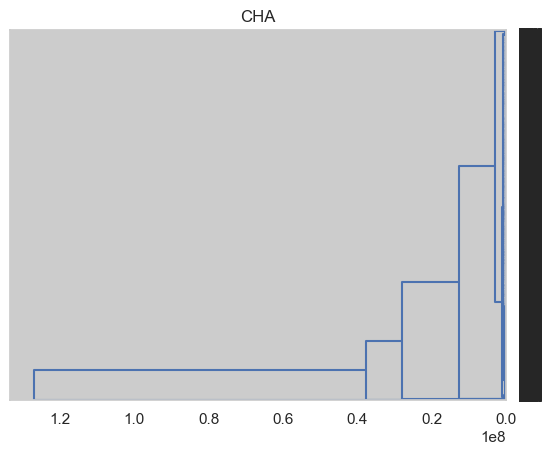

In [43]:
sample_size = 15000
sampled_data = train_WithoutLabels.sample(n=sample_size, random_state=42)
from matplotlib import pyplot as plt 
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
#Distance matrix
Z = linkage(sampled_data,method='ward',metric='euclidean')
#Plot the corresponding dendrogram 
plt.title("CHA") 
dendrogram(Z,labels=sampled_data.index,orientation='left',color_threshold=0) 
plt.show()

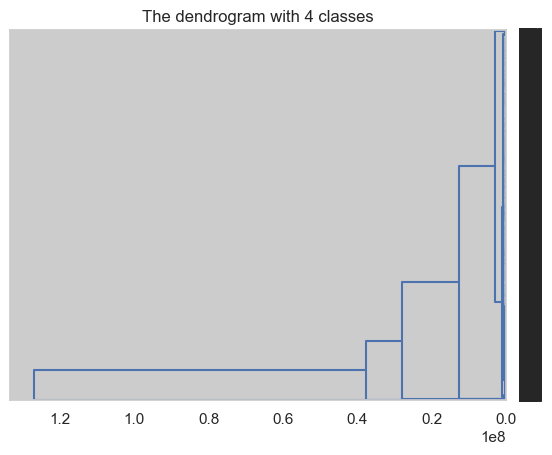

[14025  6995  9689 ...  4715 14040  4554]


In [44]:
# The dendrogram with 4 classes
plt.title('The dendrogram with 4 classes') 
dendrogram(Z,labels=sampled_data.index,orientation='left',color_threshold=0.2) 
plt.show()

groupes_cah = fcluster(Z,t=0.2,criterion='distance') 
print(groupes_cah)

In [45]:
sample_size = 15000
sampled_Labels = train_Labels.sample(n=sample_size, random_state=42)
#Display the cross table 
idg = np.argsort(groupes_cah)
pd.crosstab(sampled_Labels,groupes_cah)

col_0,1,2,3,4,5,6,7,8,9,10,...,14256,14257,14258,14259,14260,14261,14262,14263,14264,14265
'class',,,,,,,,,,,,,,,,,,,,,
anomaly,0,0,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
normal,1,1,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


## Gaussian Mixture Model (GMM)

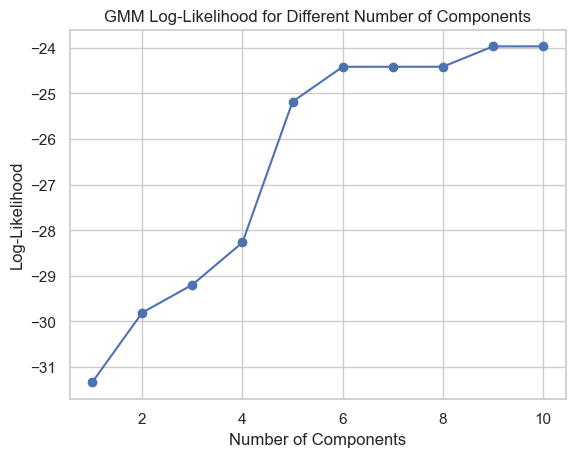

In [46]:
from sklearn.mixture import GaussianMixture
#trying to find  the appropriate number of components (n_components)
n_components_range = range(1, 11)
models = [GaussianMixture(n, random_state=42).fit(train_WithoutLabels) for n in n_components_range]
scores = [model.score(train_WithoutLabels) for model in models]

plt.plot(n_components_range, scores, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Log-Likelihood')
plt.title('GMM Log-Likelihood for Different Number of Components')
plt.show()

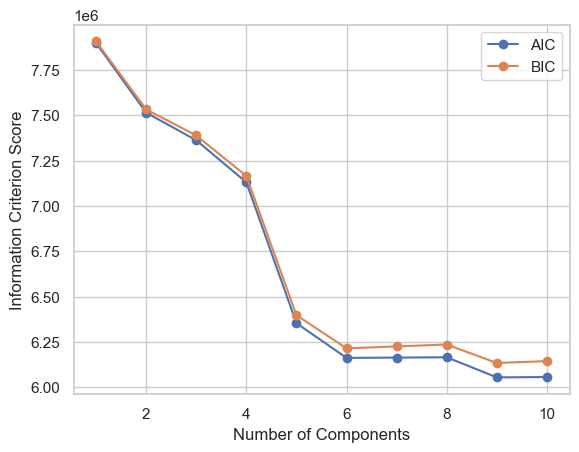

In [47]:
n_components_range = range(1, 11)
models = [GaussianMixture(n, random_state=42).fit(train_WithoutLabels) for n in n_components_range]
aic_scores = [model.aic(train_WithoutLabels) for model in models]
bic_scores = [model.bic(train_WithoutLabels) for model in models]

plt.plot(n_components_range, aic_scores, label='AIC', marker='o')
plt.plot(n_components_range, bic_scores, label='BIC', marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Information Criterion Score')
plt.legend()
plt.show()

Based on both graph the optimal number of clusters is 10

In [48]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=10, random_state=42)
gmm.fit(train_WithoutLabels)

GaussianMixture(n_components=10, random_state=42)

In [49]:
# Log-likelihood of each sample
log_likelihood = gmm.score_samples(test_WithoutLabels)

# Define a threshold for anomaly detection (e.g., using percentiles)
anomaly_threshold = np.percentile(log_likelihood, 5)  # Adjust as needed

# Identify anomalies
anomalies = test_WithoutLabels[log_likelihood < anomaly_threshold]
anomalies.head()

,'duration','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised',...,'dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate',new_udp,new_tcp,new_icmp
7,0,129,174,0,0,0,0,1,0,0,...,0.00,0.00,0.00,0.01,0.01,0.02,0.02,0.0,1.0,0.0
9,0,26,157,0,0,0,0,1,0,0,...,0.08,0.02,0.00,0.00,0.00,0.00,0.00,0.0,1.0,0.0
48,0,0,0,0,0,0,0,0,0,0,...,0.03,0.01,0.03,1.00,1.00,0.00,0.00,0.0,1.0,0.0
54,282,160,599,0,0,0,2,0,1,0,...,0.02,0.00,0.00,0.00,0.00,0.44,0.00,0.0,1.0,0.0
100,0,0,0,0,0,0,0,0,0,0,...,1.00,0.00,0.00,0.01,1.00,0.99,0.00,0.0,1.0,0.0


In [50]:
#predictions from gmm
gmm_labels = gmm.predict(test_WithoutLabels)
gmm_labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [51]:
predicted_anomalies = (gmm_labels == 1)
predicted_anomalies

array([False, False, False, ..., False, False, False])

In [52]:
test_Labels

0        anomaly
1        anomaly
2         normal
3        anomaly
4        anomaly
          ...   
22539     normal
22540     normal
22541    anomaly
22542     normal
22543    anomaly
Name: 'class', Length: 22544, dtype: object

In [53]:
test_Labels2=test_Labels
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
test_Labels2 = label_encoder.fit_transform(test_Labels2)

test_Labels2

array([0, 0, 1, ..., 0, 1, 0])

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

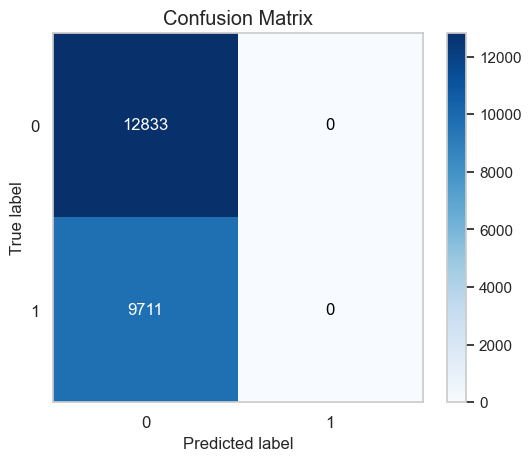

In [54]:
from sklearn.metrics import confusion_matrix, classification_report
import scikitplot.metrics as splt
#evaluating
splt.plot_confusion_matrix(test_Labels2, gmm_labels)

In [55]:
# cross Tab with original classes
pd.crosstab(test_Labels,gmm_labels)

col_0,0
'class',
anomaly,12833
normal,9711


In [56]:
print(gmm.means_)
print('\n')
print(gmm.covariances_)

[[2.84977525e+02 9.44073799e+03 2.96981025e+03 1.98470980e-04
  2.26892024e-02 1.11143749e-04 2.04417170e-01 1.22258123e-03
  3.95759072e-01 2.79272485e-01 1.34166382e-03 1.10349865e-03
  3.02215730e-01 1.26703873e-02 4.12819638e-04 4.09644102e-03
  0.00000000e+00 7.93883918e-06 9.42340211e-03 8.41137001e+01
  2.77399871e+01 2.84500845e-01 2.82502481e-01 1.19902829e-01
  1.21126759e-01 6.60908283e-01 6.30545478e-02 9.73293745e-02
  1.82150203e+02 1.15660797e+02 5.21275930e-01 8.29392758e-02
  1.48362138e-01 3.25449537e-02 2.84473615e-01 2.78501306e-01
  1.18814176e-01 1.20195137e-01 6.58209157e-02 8.15152068e-01
  1.19027016e-01]
 [3.45780000e+04 1.16751950e+09 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  1.00000000e+00 0.00000000e+00 0.00000000e+00 1.000

## DbScan

For the DBscan , We start by finding the optimal Eps for our Dataset

In [57]:
from sklearn.cluster import DBSCAN

In [58]:
from sklearn.cluster import DBSCAN
# 1. Training (Clustering)
eps = 110  
min_samples = 16  

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan.fit(train_WithoutLabels)

DBSCAN(eps=110, min_samples=16)

In [59]:
# 2. Testing (Predicting)
y_pred = dbscan.fit_predict(test_WithoutLabels)

In [60]:
# Identify anomalies (points with label -1)
db_anomalies = test_WithoutLabels[y_pred == -1]

In [61]:
# Print or visualize anomalies as needed
print("Anomalies:")
db_anomalies.head()

Anomalies:


,'duration','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised',...,'dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate',new_udp,new_tcp,new_icmp
2,2,12983,0,0,0,0,0,0,0,0,...,0.04,0.61,0.02,0.00,0.00,0.00,0.00,0.0,1.0,0.0
5,0,267,14515,0,0,0,0,0,1,0,...,0.00,0.01,0.03,0.01,0.00,0.00,0.00,0.0,1.0,0.0
14,37,773,364200,0,0,0,0,0,1,0,...,0.05,0.03,0.04,0.00,0.77,0.00,0.07,0.0,1.0,0.0
30,805,76944,1,0,0,0,0,0,1,0,...,0.01,0.00,0.00,0.00,0.00,0.07,0.07,0.0,1.0,0.0
32,0,301,19794,0,0,0,0,0,1,0,...,0.00,0.05,0.02,0.05,0.00,0.00,0.00,0.0,1.0,0.0


In [62]:
pd.crosstab(test_Labels, y_pred)

col_0,-1,0,1,2,3,4,5,6,7,8,...,21,22,23,24,25,26,27,28,29,30
'class',,,,,,,,,,,,,,,,,,,,,
anomaly,425,9623,0,318,497,313,221,156,33,527,...,25,0,31,18,0,0,0,0,0,16
normal,1635,7257,322,0,0,0,0,0,12,0,...,0,31,0,0,45,35,20,17,16,1


#### Evaluate

A statistic called **Silhouette Score** is employed to determine how good a clustering process is. It gauges how distinct each cluster is inside a specific clustering arrangement. A higher score denotes better-defined clusters; the score goes from -1 to 1.

The model with the **higher** Silhouette Score would be considered superior when comparing models using the Silhouette Score. A higher score implies that the data points inside each cluster are closer to one another than they are to points in other clusters, and that the clusters are more clearly defined.

In [67]:
#Fit each selected model to the data
kmeans_labels = Kmeans_model.fit_predict(sampled_data)

hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(sampled_data)

gmm_labels = gmm.fit_predict(sampled_data)

dbscan_labels = dbscan.fit_predict(sampled_data)

In [64]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

silhouette_kmeans = silhouette_score(sampled_Labels, kmeans_labels)
silhouette_hierarchical = silhouette_score(sampled_data, hierarchical_labels)
silhouette_gmm = silhouette_score(sampled_data, gmm_labels)
silhouette_dbscan = silhouette_score(sampled_data, dbscan_labels)

In [65]:
print(f"Silhouette Score for KMeans: {silhouette_kmeans}")
print(f"Silhouette Score for HAC: {silhouette_hierarchical}")
print(f"Silhouette Score for GMM: {silhouette_gmm}")
print(f"Silhouette Score for DbScan: {silhouette_dbscan}")

Silhouette Score for KMeans: 0.9968099211272449
Silhouette Score for HAC: 0.9984936011545101
Silhouette Score for GMM: 0.9888960171640782
Silhouette Score for DbScan: 0.18717607041630147


## Conclusion

Considering anomaly detection, unsupervised models are better suited to the real  scenario, with unknown or untagged attacks or anomalies in datasets. We evaluate the impact of different preprocessing on the anomaly detection performance  of different algorithms. We consider normalization, PCA and the probabilities  of normal features with GMM. The best results are obtained using GMM and HAC even although the latter requires less information than the former. Using the silhouette Score, GMM gives a score of 99.88 and the HAC a close second with 98.84.Therefore, the results show that GMM gives an overall better result as compared to all the other algorithm which are HAC ,Kmeans and Dbscan.


## Step 6 : Deployment

We're going to use the GMM() as the classifier for our model deployment.

In [75]:
from sklearn.preprocessing import StandardScaler ,OrdinalEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Selecting categorical and numeric features
numerical_ix = train_WithoutLabels.select_dtypes(include=np.number).columns
categorical_ix = train_WithoutLabels.select_dtypes(exclude=np.number).columns
# Create preprocessing pipelines for each datatype
numerical_transformer = Pipeline(steps=[
('imputer', SimpleImputer(strategy='median')),
('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[
('encoder', OrdinalEncoder()),
('scaler', StandardScaler())])
# Putting the preprocessing steps together
preprocessor = ColumnTransformer([
('numerical', numerical_transformer, numerical_ix),
('categorical', categorical_transformer, categorical_ix)],
remainder='passthrough')

In [84]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import cross_val_score

pipe = Pipeline(steps=[
  ('preprocessor', preprocessor),
  ('selector', SelectKBest(k='all')),
  ('classifier', GaussianMixture())])
score = cross_val_score(pipe, train_WithoutLabels, train_Labels, cv=10, scoring='roc_auc').mean()

In [ ]:
# Creating the grid
grid = {
    'classifier__n_components': [2, 4, 8],  # Example parameter for GMM
    'classifier__covariance_type': ['full', 'tied', 'diag', 'spherical'],
    'classifier__max_iter': [50, 100, 200]
}
# Instantiating the gridsearch and fitting the data
gridsearch = GridSearchCV(estimator=pipe, param_grid=grid, n_jobs= 1, scoring='roc_auc')
# GridSearchCV uses 5-fold CV by default
gridsearch.fit(train_WithoutLabels,train_Labels)
# Getting the results
print(gridsearch.best_params_)
print(gridsearch.best_score_)

In [ ]:
import pickle
pickle.dump(gridsearch,open('Unsupervised_NSL_KDD.pkl','wb'))